In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, accuracy_score

In [2]:
curve = np.load("Precision_Recall_Curve.npy", allow_pickle = True).item()
print(curve)

{'Precision': array([0.22446432, 0.22446379, 0.22446394, ..., 1.        , 1.        ,
       1.        ]), 'Recall': array([1.        , 0.99999695, 0.99999695, ..., 0.00428535, 0.00168429,
       0.        ]), 'Thresholds': array([4.1808066e-06, 4.1812932e-06, 4.1822145e-06, ..., 9.9999976e-01,
       9.9999988e-01, 1.0000000e+00], dtype=float32)}


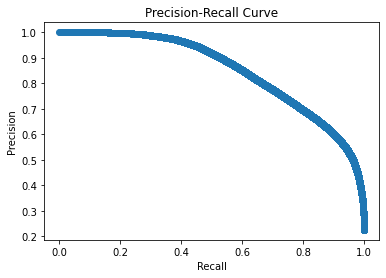

In [3]:
plt.figure()
plt.scatter(curve['Recall'], curve['Precision'])
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision');

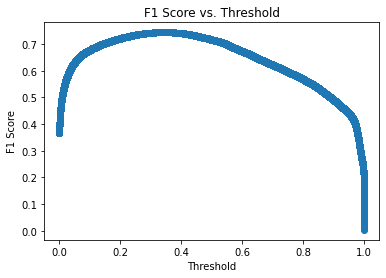

In [4]:
f1_scores = 2  / (1 / curve['Recall'][:-1] + 1 / curve['Precision'][:-1])

plt.figure()
plt.scatter(curve['Thresholds'], f1_scores)
plt.title('F1 Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score');

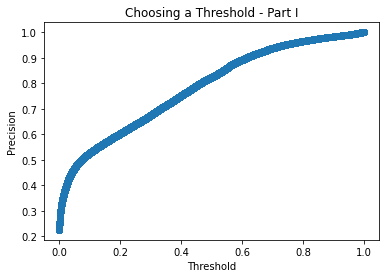

In [5]:
plt.figure()
plt.scatter(curve['Thresholds'], curve['Precision'][:-1])
plt.title('Choosing a Threshold - Part I')
plt.xlabel('Threshold')
plt.ylabel('Precision');

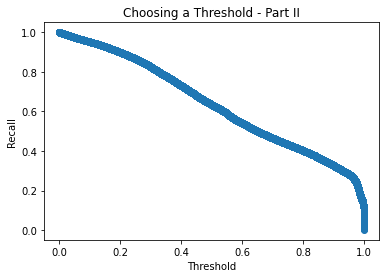

In [6]:
plt.figure()
plt.scatter(curve['Thresholds'], curve['Recall'][:-1])
plt.title('Choosing a Threshold - Part II')
plt.xlabel('Threshold')
plt.ylabel('Recall');

In [7]:
curve['Thresholds'][np.argmax(f1_scores)]

0.35047975

In [8]:
predicted = np.load("Predictions.npy", allow_pickle = True)
actual = np.load("Actual.npy", allow_pickle = True)
print(predicted[0], actual[0])

[9.93122280e-01 5.68892434e-03 6.82008080e-03 2.45291013e-02
 7.91756153e-01 2.64729321e-01 3.56640713e-03 9.80713010e-01
 1.33473715e-02 1.04245888e-02 4.86075692e-02 1.63357742e-02
 7.75352644e-04 6.67466642e-03 6.03614032e-01 8.41713604e-03
 2.99817789e-02 4.66311276e-02 3.89602559e-04 4.39210242e-04
 2.99473088e-02 5.88193178e-01 1.23418344e-03 3.18398001e-03
 1.83878350e-03 3.71924858e-03 1.33097582e-02 9.35301334e-02
 9.68592465e-02 4.09670174e-02 9.58570279e-04 4.84033069e-03
 1.87553104e-03 7.83839636e-03 1.28009974e-03 3.79833102e-01
 9.01639636e-04 2.47889286e-04 7.38275849e-05 1.64705882e-04
 4.62038661e-05 2.67497133e-02 9.39569063e-08 9.39569063e-08
 9.39569063e-08 9.39569063e-08 9.39569063e-08 9.39569063e-08
 9.39569063e-08 9.39569063e-08 9.39569063e-08 9.39569063e-08
 9.39569063e-08 9.39569063e-08 9.39569063e-08 9.39569063e-08
 9.39569063e-08 9.39569063e-08 9.39569063e-08 9.39569063e-08
 9.39569063e-08 9.39569063e-08 9.39569063e-08 9.39569063e-08
 9.39569063e-08 9.395690

In [9]:
compton = np.load("Compton.npy", allow_pickle = True)
print(compton[0])

[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
types = np.load("Types.npy", allow_pickle = True)
print(types[0])

[b'ege' b'' b'' b'' b'egg' b'' b'' b'ee' b'' b'' b'' b'' b'' b'' b'ee' b''
 b'' b'' b'' b'' b'' b'ee' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'gg' b'' b'' b'' b'' b'' b'']


In [25]:
filt_pred = []
filt_act = []

for i in range(len(predicted)):
    mask = compton[i].astype(int)
    mask = np.pad(mask, [(0, len(predicted[i]) - len(mask))], mode = 'constant').astype(bool)
    filt_pred.append(predicted[i][mask])
    filt_act.append(actual[i][mask])
    
print(filt_pred[0], filt_act[0])

[0.9931223  0.79175615] [1. 1.]


In [30]:
filt_type = []

for i in range(len(predicted)):
    mask = compton[i].astype(int).astype(bool)
    filt_type.append(types[i][mask])

print(filt_type[0])

[b'ege' b'egg']


In [39]:
print(set([len(typ) for typ in filt_type]))

{1, 2, 3, 4, 5}


In [11]:
new_precisions, new_recalls, new_thresholds = precision_recall_curve(np.hstack(np.array(filt_act)), 
                                                                     np.hstack(np.array(filt_pred)))

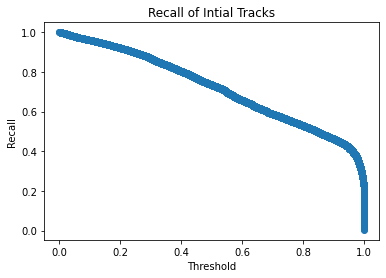

In [12]:
plt.figure()
plt.scatter(new_thresholds, new_recalls[:-1])
plt.title('Recall of Intial Tracks')
plt.xlabel('Threshold')
plt.ylabel('Recall');

In [54]:
unpad_pred = []
unpad_act = []
mean_acc = 0

for i in range(len(predicted)):
    orig_pred = predicted[i][:len(compton[i])]
    orig_act = actual[i][:len(compton[i])]
    unpad_pred.append(orig_pred)
    unpad_act.append(orig_act)
    mean_acc += accuracy_score(orig_pred >= 0.5, orig_act)

print(mean_acc / len(predicted))

0.8959929694390061


In [61]:
compare_pred = [1.0 * (unpad >= 0.4) for unpad in unpad_pred]
print(compare_pred[0], unpad_act[0])

[1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [62]:
accuracies = [accuracy_score(*pair) for pair in zip(compare_pred, unpad_act)]
print(np.mean(accuracies))

0.8947336232375863


In [63]:
filt_pred_new = [1.0 * (filt >= 0.4) for filt in filt_pred]
print(filt_pred_new[0], filt_act[0])

[1. 1.] [1. 1.]


In [64]:
filt_accs = [accuracy_score(*pair) for pair in zip(filt_pred_new, filt_act)]
print(np.mean(filt_accs))

0.8030122442896588


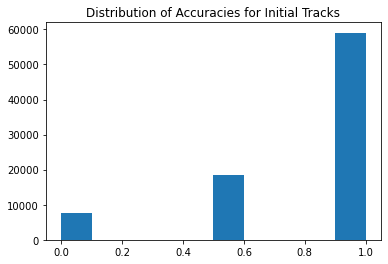

In [65]:
plt.hist(filt_accs)
plt.title('Distribution of Accuracies for Initial Tracks');

In [66]:
elec_acc_list = [filt_p[0] == filt_a[0] for (filt_p, filt_a) in zip(filt_pred_new, filt_act)]
gamma_acc_list = [filt_p[1] == filt_a[1] if len(filt_p) >= 2 else False for (filt_p, filt_a) in zip(filt_pred_new, filt_act)]

elec_acc = sum(elec_acc_list) / len(elec_acc_list)
gamma_acc = sum(gamma_acc_list) / len(gamma_acc_list)
print(elec_acc, gamma_acc)

0.8677993222891566 0.7380929969879518
